<h1>Exercise 2</h2>

In [6]:
from typing import TypedDict, List
from langgraph.graph import StateGraph
from math import prod

In [7]:
class AgentState(TypedDict):
    values: List[int]
    name: str
    operation: str
    result: str

In [27]:

import stat


def procces_operation(state: AgentState) -> AgentState:
    """This function will process the operation"""
    if state['operation'] == "+":
        state['result'] = f"Hi {state['name']} your result is {sum(state['values'])}"
    elif state['operation'] == "*":
        state['result'] = f"Hi {state['name']} your result is {prod(state['values'])}"
    else:
        state['result'] = "Invalid Operation"
    
    return state


In [28]:
graph = StateGraph(AgentState)

graph.add_node("proccesor", procces_operation)
graph.set_entry_point("proccesor")
graph.set_finish_point("proccesor")

app = graph.compile()

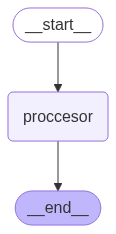

In [11]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [33]:
answerAdd = app.invoke({"values": [1, 2, 3, 4], "name": "Coke","operation": "+"})
answerMul = app.invoke({"values": [1, 2, 3, 4], "name": "Coke","operation": "*"})
answerWrong = app.invoke({"values": [1, 2, 3, 4], "name": "Coke","operation": "?"})

In [34]:
print(answerAdd["result"])

Hi Coke your result is 10


In [35]:
print(answerMul["result"])

Hi Coke your result is 24


In [36]:
print(answerWrong["result"])

Invalid Operation
